In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [3]:
# The slope of the straight line fit going through the orgin is the diffraction grating (d)
def fitfunc(x, m):
    return(m*x)

In [8]:
# Krypton Data
Kr_theta = np.array(np.radians([45.8, 42.5, 32.9, 31.9, 30.2, 29.8, 29.1]) )
Kr_theta_unc = np.radians(np.ones(len(Kr_theta)))
Kr_lam = np.array([587.09, 557.03, 450.24, 446.37, 445.39, 443.17, 439.99]) # Nanometers


#Hydrogen Data
H_theta = np.array(np.radians([54.2, 35.6, 31]) )
H_theta_unc = np.radians(np.ones(len(H_theta))*.5)
H_lam = np.array([656.28, 486.14, 434.05])


The slope and value of d for Krypton is 788.6584362509735± [394.96516301] 
  The slope and value of d for Hydrogen is 788.6584362509735± [1179.34884456] 
The average slope and value of d is 762.1740562234233


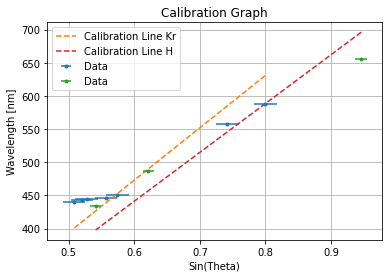

In [10]:
popt_Kr, pcov_Kr = curve_fit(fitfunc, Kr_theta, Kr_lam ,sigma=Kr_theta_unc)
popt_H, pcov_H = curve_fit(fitfunc, H_theta, H_lam ,sigma=H_theta_unc)

#Slope 
d1 = popt_Kr[0]
d2 = popt_H[0]
#Unc. In slope
dd_Kr =  pcov_Kr[0]
dd_H = pcov_H[0]

print(f'The slope and value of d for Krypton is {d1}\u00B1 {dd_Kr} \n  The slope and value of d for Hydrogen is {d1}\u00B1 {dd_H} ')

#Calibration value of d
d = (d1 + d2) / 2
d_unc = ( dd_Kr + dd_H ) / 2
print(f'The average slope and value of d is {d}')

#Plot 
plt.figure()
plt.errorbar(Kr_theta, Kr_lam, xerr=Kr_theta_unc, fmt='.', label='Data')
plt.plot(Kr_theta, fitfunc(Kr_theta, d1),'--', label='Calibration Line Kr' )
plt.errorbar(H_theta, H_lam,  xerr=H_theta_unc , fmt='.', label='Data')
plt.plot(H_theta, fitfunc(H_theta, d2),'--', label='Calibration Line H' )
plt.plot()
plt.ylabel('Wavelength [nm]')
plt.xlabel('Sin(Theta)')
plt.title('Calibration Graph')
plt.grid()
plt.legend()
plt.savefig('Calibration Graph')

In [11]:
fitting1 = fitfunc(Kr_theta, d1)
fitting2 = fitfunc(H_theta, d2)

#Finding the Chi Square 
residual1 = Kr_lam - fitting1
residual2 = H_lam - fitting2
chi_sqr1 = np.sum( residual1**2 / Kr_theta_unc**2)
chi_sqr2 = np.sum(residual2**2 / H_theta_unc**2)

#Finding Reduced Chi Square
rchi_sqr1 = chi_sqr1 /(len(Kr_lam)-1)
rchi_sqr2 = chi_sqr2 /(len(H_lam)-1)

print(chi_sqr1, chi_sqr2)
print(rchi_sqr1, rchi_sqr2)

20500587.962243162 48740128.92600598
3416764.6603738605 24370064.46300299


In [14]:
Na_theta = np.array(np.radians([49,48.9,46,45.9,43.6,43.5,38.7,38.6,31.9,31.8]))
Na_theta_unc = np.radians(np.ones(len(Na_theta))*.5)

def lam(d,theta,n):
    return(d * np.sin(theta) / n)

Na_lam = lam(d, Na_theta, 1)

for i in range(len(Na_lam)):
    print(f"The wavelength of the sodium doublet {Na_lam[i]}")

The wavelength of the sodium doublet 575.2200620290672
The wavelength of the sodium doublet 574.3464673320221
The wavelength of the sodium doublet 548.2621334270572
The wavelength of the sodium doublet 547.3372332468796
The wavelength of the sodium doublet 525.610124899962
The wavelength of the sodium doublet 524.6459990764619
The wavelength of the sodium doublet 476.54373150329235
The wavelength of the sodium doublet 475.5048428190264
The wavelength of the sodium doublet 402.7619890392824
The wavelength of the sodium doublet 401.63203610414354
